# Problem Statement:
Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Salary_Data.csv')  #  Used to Loading data

In [3]:
df=data.copy()  # This line is for Backup for data

In [4]:
df.head(5)   #it will show first 5 rows

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.tail(5)  #it will show last 5 rows

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
df.describe()   #for data manipulation and analysis

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.info() # it gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# DATA PREPROCESSING

### Identifing Null Values & Duplicate values

In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Identifying Outliers

<Axes: >

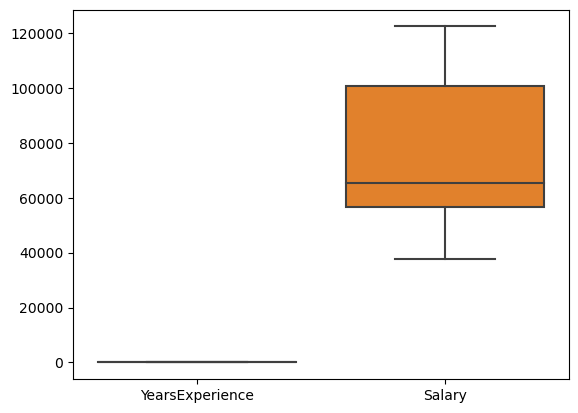

In [62]:
sns.boxplot(data=df)

# Data Visualization

<Axes: xlabel='YearsExperience', ylabel='Count'>

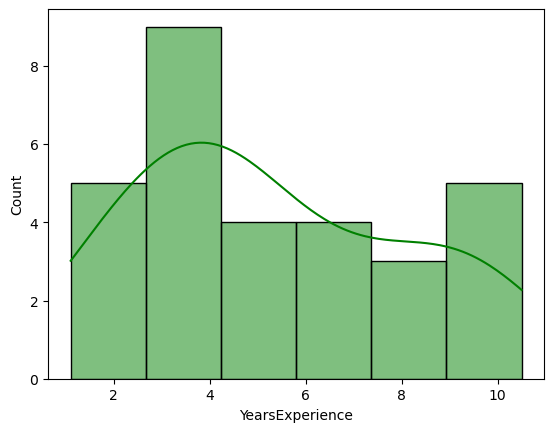

In [11]:
sns.histplot(df['YearsExperience'],kde=True,color='green')

<Axes: xlabel='Salary', ylabel='Count'>

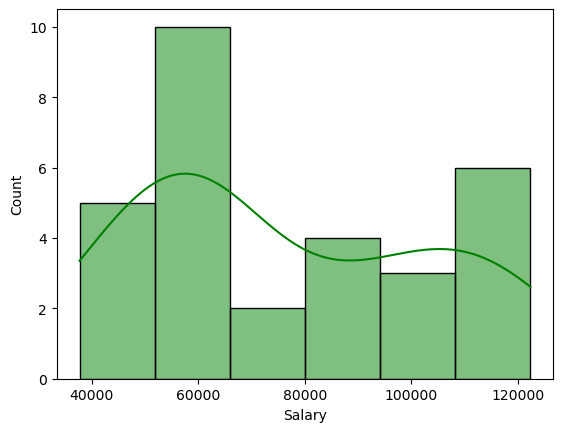

In [12]:
sns.histplot(df['Salary'],kde=True,color='green')

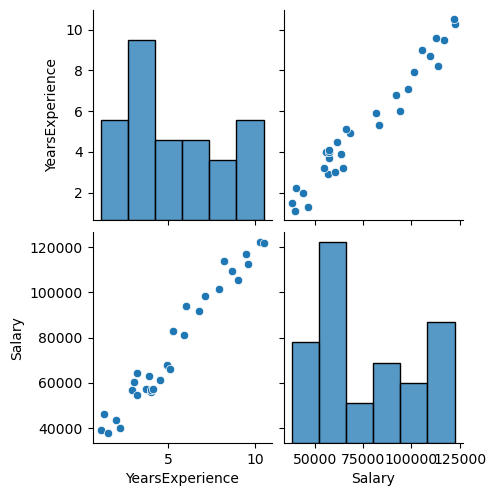

In [13]:
sns.pairplot(df)

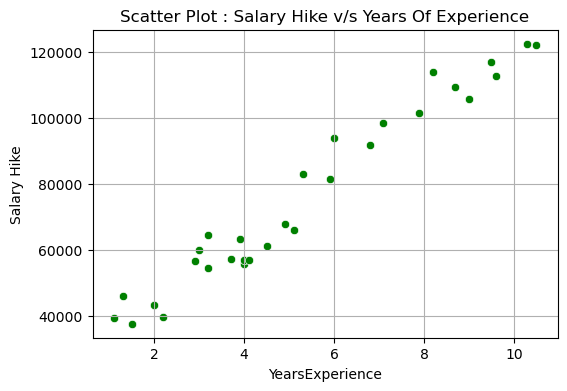

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='YearsExperience',y='Salary',color='green')
plt.xlabel('YearsExperience')
plt.ylabel('Salary Hike')
plt.title('Scatter Plot : Salary Hike v/s Years Of Experience')
plt.grid()
plt.show()

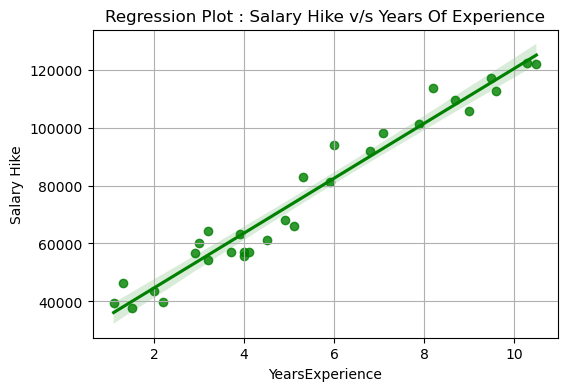

In [15]:
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='YearsExperience',y='Salary',color='green')
plt.xlabel('YearsExperience')
plt.ylabel('Salary Hike')
plt.title('Regression Plot : Salary Hike v/s Years Of Experience')
plt.grid()
plt.show()

# DATA SPLITTING

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df[['YearsExperience']]
y=df[['Salary']]
X_train, X_test, y_train, y_test=train_test_split(X,y , test_size=0.2,random_state=42)

# MODEL SELECTION

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
predicted_salary= model.predict(X_test)

# MODEL EVALUATION

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
mae=mean_absolute_error(y_test,predicted_salary)
mse=mean_squared_error(y_test,predicted_salary)
rmse=mean_squared_error(y_test,predicted_salary,squared=False)
r2=r2_score(y_test,predicted_salary)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Sqaured (R2):",r2)

Mean Absolute Error (MAE): 6286.453830757749
Mean Squared Error (MSE): 49830096.85590839
Root Mean Squared Error (RMSE): 7059.04362190151
R-Sqaured (R2): 0.9024461774180497


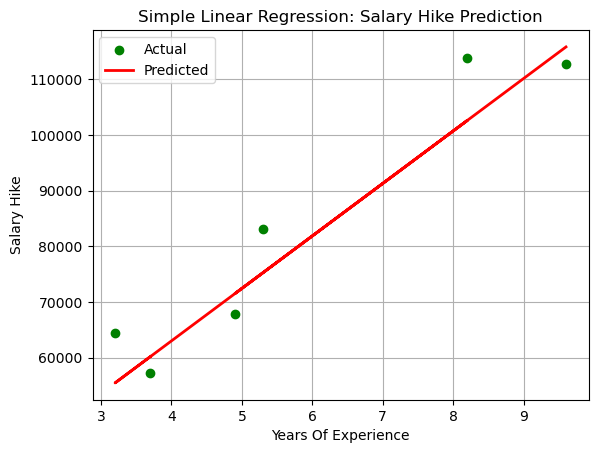

In [30]:
plt.scatter(X_test, y_test, color='Green', label='Actual')
plt.plot(X_test,predicted_salary,color='red',linewidth=2,label='Predicted')
plt.xlabel("Years Of Experience")
plt.ylabel("Salary Hike")
plt.legend()
plt.title("Simple Linear Regression: Salary Hike Prediction")
plt.grid()
plt.show()

# Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
polynomial_convertor=PolynomialFeatures(degree=2, include_bias=False)


In [35]:
polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [36]:
PolynomialFeatures(include_bias=False)

PolynomialFeatures(include_bias=False)

In [37]:
poly_features=polynomial_convertor.transform(X)

In [38]:
poly_features.shape

(30, 2)

In [39]:
poly_features[0]

array([1.1 , 1.21])

In [40]:
polynomial_convertor.fit_transform(X)

array([[  1.1 ,   1.21],
       [  1.3 ,   1.69],
       [  1.5 ,   2.25],
       [  2.  ,   4.  ],
       [  2.2 ,   4.84],
       [  2.9 ,   8.41],
       [  3.  ,   9.  ],
       [  3.2 ,  10.24],
       [  3.2 ,  10.24],
       [  3.7 ,  13.69],
       [  3.9 ,  15.21],
       [  4.  ,  16.  ],
       [  4.  ,  16.  ],
       [  4.1 ,  16.81],
       [  4.5 ,  20.25],
       [  4.9 ,  24.01],
       [  5.1 ,  26.01],
       [  5.3 ,  28.09],
       [  5.9 ,  34.81],
       [  6.  ,  36.  ],
       [  6.8 ,  46.24],
       [  7.1 ,  50.41],
       [  7.9 ,  62.41],
       [  8.2 ,  67.24],
       [  8.7 ,  75.69],
       [  9.  ,  81.  ],
       [  9.5 ,  90.25],
       [  9.6 ,  92.16],
       [ 10.3 , 106.09],
       [ 10.5 , 110.25]])

In [41]:
X_train,X_test,y_train,y_test= train_test_split(poly_features,y,test_size=0.3,random_state=42)

In [42]:
poly_model=LinearRegression()

In [43]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [44]:
LinearRegression()

LinearRegression()

In [47]:
test_predictions= poly_model.predict(X_test)

In [48]:
poly_model.coef_

array([[8667.32696897,   60.92217899]])

# MODEL EVALUATION

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
MAE= mean_absolute_error(y_test,test_predictions)
MSE= mean_squared_error(y_test,test_predictions)
RMSE= np.sqrt(MSE)

print('MAE=', MAE)
print('MSE=', MSE)
print('RMSE=',RMSE)

MAE= 5199.782073940218
MSE= 38366233.44282789
RMSE= 6194.0482273572825


In [53]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):
    
    poly_convertor = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_convertor.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train,y_train)
    
    train_pred = poly_model.predict(X_train)
    test_pred = poly_model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [54]:
train_rmse_error

[5377.937858732068,
 5359.821382288371,
 4907.3514508807175,
 4886.865253398572,
 4729.28343978914,
 4698.02974592101,
 3811.247361657503,
 3749.948334888463,
 3405.0118533197983]

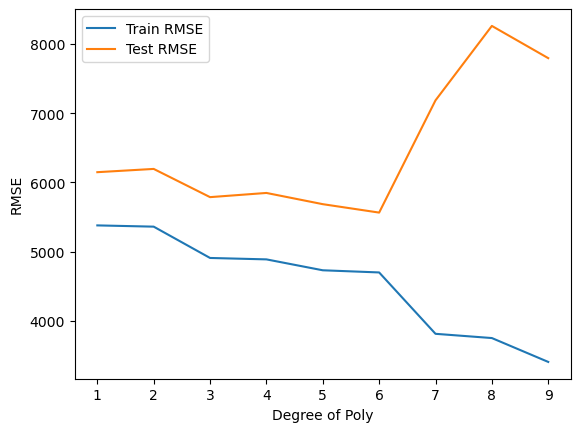

In [57]:
plt.plot(range(1,10),train_rmse_error, label='Train RMSE')
plt.plot(range(1,10),test_rmse_error,label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

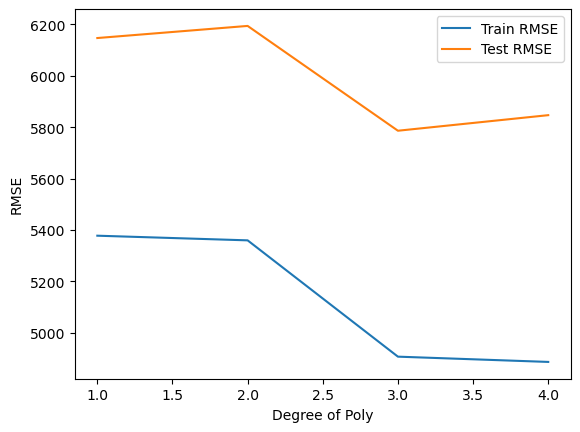

In [58]:
plt.plot(range(1,5),train_rmse_error[:4], label='Train RMSE')
plt.plot(range(1,5),test_rmse_error[:4],label='Test RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()


In [59]:
final_poly_convertor=PolynomialFeatures(degree=3,include_bias=False)


In [60]:
final_model= LinearRegression()

In [61]:
full_converted_X= final_poly_convertor.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

# MODEL DEPLOYMENT

In [ ]:
#from joblib import dump.load


#dump(final_model, 'final_poly_model.joblib')